# Initial Package/Data Load

In [58]:
import pandas as pd
import numpy as np
import timeit
from timeit import time
import sklearn.metrics as metrics
from sklearn.utils import resample
from tqdm import tqdm

In [3]:
google_colab = False

if google_colab == True:
    
    #for colab
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    df = pd.read_csv('/content/drive/MyDrive/dissertation_data/MLdata.csv')
else:
    
    df = pd.read_csv('/Users/josephmeyer/Desktop/git/NLP/dissertation/MLdata.csv')


In [4]:
df.head()

,Respondent_ID,open_ended_1,open_ended_2,open_ended_3,open_ended_4,open_ended_5,E_Scale_score,A_Scale_score,O_Scale_score,C_Scale_score,N_Scale_score,Dataset
0,10446116527,"I would change my vacation week, because I am ...",I would reach out to my boss and ask him or he...,I would not go. I am a not a social person. I ...,I would ask my manager why he/she gave me such...,I would find this experience super enjoyable. ...,2.250000,3.750000,3.166667,3.750000,2.916667,Train
1,10440100535,I would talk to my colleague and see if they w...,I would continue to work on the project that w...,I would talk to my colleague and try to talk t...,I would feel upset about the negative feedback...,I would find this experience enjoyable. I feel...,4.666667,4.416667,4.583333,5.000000,1.333333,Train
2,10462850071,I would feel upset because perhaps I already b...,I would start working on the project now and g...,I would feel guilty about thinking about not g...,I would feel really defensive about it. I woul...,I would find it enjoyable because I would be r...,2.250000,4.750000,4.083333,4.666667,2.166667,Train
3,10460008027,I would suggest that whoever requested the tim...,I would try to finish early because it's alway...,"I wouldn't want to go, but I'd have to weigh t...",I would first wait until I'm calm. Then I wou...,I would love to have the opportunity to learn ...,2.916667,4.083333,3.916667,4.916667,1.333333,Train
4,10459746373,I would talk to my colleague to see if he has ...,I would remind my boss that I am working on th...,I would go anyway. Networking is a good way to...,I would talk to my manager first and get some ...,I would find this experience enjoyable as I am...,3.750000,4.750000,3.666667,4.916667,1.583333,Train


# Basic Data Manipulation

In [5]:
#concatenate responses
df['Response'] = df['open_ended_1'] + df['open_ended_2'] + df['open_ended_3'] + df['open_ended_4'] + df['open_ended_5']

In [6]:
df.head()

,Respondent_ID,open_ended_1,open_ended_2,open_ended_3,open_ended_4,open_ended_5,E_Scale_score,A_Scale_score,O_Scale_score,C_Scale_score,N_Scale_score,Dataset,Response
0,10446116527,"I would change my vacation week, because I am ...",I would reach out to my boss and ask him or he...,I would not go. I am a not a social person. I ...,I would ask my manager why he/she gave me such...,I would find this experience super enjoyable. ...,2.250000,3.750000,3.166667,3.750000,2.916667,Train,"I would change my vacation week, because I am ..."
1,10440100535,I would talk to my colleague and see if they w...,I would continue to work on the project that w...,I would talk to my colleague and try to talk t...,I would feel upset about the negative feedback...,I would find this experience enjoyable. I feel...,4.666667,4.416667,4.583333,5.000000,1.333333,Train,I would talk to my colleague and see if they w...
2,10462850071,I would feel upset because perhaps I already b...,I would start working on the project now and g...,I would feel guilty about thinking about not g...,I would feel really defensive about it. I woul...,I would find it enjoyable because I would be r...,2.250000,4.750000,4.083333,4.666667,2.166667,Train,I would feel upset because perhaps I already b...
3,10460008027,I would suggest that whoever requested the tim...,I would try to finish early because it's alway...,"I wouldn't want to go, but I'd have to weigh t...",I would first wait until I'm calm. Then I wou...,I would love to have the opportunity to learn ...,2.916667,4.083333,3.916667,4.916667,1.333333,Train,I would suggest that whoever requested the tim...
4,10459746373,I would talk to my colleague to see if he has ...,I would remind my boss that I am working on th...,I would go anyway. Networking is a good way to...,I would talk to my manager first and get some ...,I would find this experience enjoyable as I am...,3.750000,4.750000,3.666667,4.916667,1.583333,Train,I would talk to my colleague to see if he has ...


In [8]:
df[1080:1089]

,Respondent_ID,open_ended_1,open_ended_2,open_ended_3,open_ended_4,open_ended_5,E_Scale_score,A_Scale_score,O_Scale_score,C_Scale_score,N_Scale_score,Dataset,Response
1080,10440169865,I would allow my colleague to take the vacatio...,I would put all my efforts in my current proje...,I would persuade my colleague to go but if uns...,I would be in a dilemma of facing my manager r...,i would find it both enjoyable and boring in t...,4.333333,4.416667,4.500000,4.750000,2.000000,Train,I would allow my colleague to take the vacatio...
1081,10440130668,I would oblige to working the same week we bot...,I would take a couple days to complete this pr...,I would still go regardless if my colleague go...,I would request a meeting with my manager. Th...,I would find this experience very enjoyable. ...,3.416667,4.666667,4.500000,4.083333,1.333333,Train,I would oblige to working the same week we bot...
1082,10459907870,I would try to change my time if it was not so...,I would try to get as much done as possible ea...,I would not go because I am very introverted. ...,I would ask for a meeting with the supervisor ...,I would find it enjoyable and exciting. I lik...,3.416667,3.250000,3.500000,4.833333,2.750000,Train,I would try to change my time if it was not so...
1083,10459662418,I would change it. Unless they have been on va...,I would message them about my upcoming project...,I would try my best to think of ways to make t...,Not really sure how to handle this one. Refusi...,I think it would be awesome. The one thing tha...,2.500000,4.250000,4.250000,2.250000,4.333333,Train,I would change it. Unless they have been on va...
1084,10440108945,I would change my plans. I would try to do thi...,I would try to do as much work as I could on i...,I would encourage my colleague to go with me. ...,I would feel very bad and angry in this situat...,I would find this enjoyable. I think that it w...,3.000000,2.833333,2.916667,3.500000,3.083333,Train,I would change my plans. I would try to do thi...
1085,10459998084,I would meet with my colleague and discuss the...,I would begin on the project right away and co...,I would attend the gathering regardless of the...,I would feel very upset and uncomfortable in t...,I would find this experience very enjoyable an...,3.833333,3.083333,4.916667,5.000000,1.750000,Train,I would meet with my colleague and discuss the...
1086,10463035379,I would change my plan simply to show the supe...,I would take it on with zero complaints. I wou...,I would go with zero reservations or issues. I...,I would make it a point to say my peace to him...,I would find this extremly enjoyable how can o...,4.500000,3.833333,3.416667,4.833333,1.000000,Train,I would change my plan simply to show the supe...
1087,10459788032,I would change to keep the peace and look like...,I would show my boss that I am handling the pr...,I would ask the client to please go. I would e...,I would feel bad and hurt.I would ask my boss ...,I would find this experience very enjoyable an...,2.750000,2.916667,3.416667,3.333333,3.666667,Train,I would change to keep the peace and look like...
1088,10460010474,I would look into changing my vacation plans t...,I would work on the project little by little d...,I would probably still go. Just depending on h...,I would see what I could to do to improve the ...,I would absolutely enjoy being involved in thi...,3.833333,4.666667,4.416667,4.583333,1.583333,Dev,I would look into changing my vacation plans t...


# Exploratory Data Analysis

In [9]:
#length
len(df)

1688

In [10]:
len(df.loc[df.Dataset == 'Dev'])

300

In [11]:
len(df.loc[df.Dataset == 'Test'])

300

In [12]:
df.dtypes

Respondent_ID      int64
open_ended_1      object
open_ended_2      object
open_ended_3      object
open_ended_4      object
open_ended_5      object
E_Scale_score    float64
A_Scale_score    float64
O_Scale_score    float64
C_Scale_score    float64
N_Scale_score    float64
Dataset           object
Response          object
dtype: object

In [18]:
#check average string length
res = [x for x in df['Response']]
length = [len(ele) for ele in res]
result = 0 if len(length) == 0 else (float(sum(length)) / len(length)) 
print("The Average length of String in list is : " + str(result))

The Average length of String in list is : 1288.4644549763034


In [19]:
round(df[['E_Scale_score','A_Scale_score','O_Scale_score','C_Scale_score','N_Scale_score']].describe(), 2)

,E_Scale_score,A_Scale_score,O_Scale_score,C_Scale_score,N_Scale_score
count,1688.00,1688.00,1688.00,1688.00,1688.00
mean,3.49,4.12,3.86,4.40,2.07
std,0.79,0.61,0.71,0.59,0.76
min,1.00,1.33,1.17,1.00,1.00
25%,3.00,3.75,3.42,4.08,1.50
50%,3.50,4.17,3.92,4.58,2.00
75%,4.08,4.58,4.42,4.92,2.58
max,5.00,5.00,5.00,5.00,4.83


In [21]:
descriptives = round(df[['E_Scale_score','A_Scale_score','O_Scale_score','C_Scale_score','N_Scale_score']].describe(), 2)

if google_colab == True:
    from google.colab import files
    descriptives.to_csv('descriptives.csv') 
    files.download('descriptives.csv')
else:
    descriptives.to_csv('/Users/josephmeyer/Desktop/git/NLP/dissertation/descriptives.csv')

print('Downloaded')


Downloaded


# Text Cleaning for Bag of Words

In [22]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [23]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/josephmeyer/nltk_data...


True

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/josephmeyer/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/josephmeyer/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [26]:
#set stop words
stop_words = set(stopwords.words('english'))
#set lemmatizer
ps = PorterStemmer()

In [27]:
def clean_text(text):
    """
    
    1. Lowercases text
    2. Removes punctuation
    3. Removes numbers
    4. Removes stop words
    5. Lemmatizes text
    
    """
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    text = "".join([i for i in text if not i.isdigit()])
    text = " ".join([w for w in text.split() if w not in stop_words])
    text = " ".join([ps.stem(w) for w in text.split()])

    return text

In [28]:
df['Cleaned_response'] = df['Response'].apply(clean_text)

In [29]:
df.head()

,Respondent_ID,open_ended_1,open_ended_2,open_ended_3,open_ended_4,open_ended_5,E_Scale_score,A_Scale_score,O_Scale_score,C_Scale_score,N_Scale_score,Dataset,Response,Cleaned_response
0,10446116527,"I would change my vacation week, because I am ...",I would reach out to my boss and ask him or he...,I would not go. I am a not a social person. I ...,I would ask my manager why he/she gave me such...,I would find this experience super enjoyable. ...,2.250000,3.750000,3.166667,3.750000,2.916667,Train,"I would change my vacation week, because I am ...",would chang vacat week better employe work tim...
1,10440100535,I would talk to my colleague and see if they w...,I would continue to work on the project that w...,I would talk to my colleague and try to talk t...,I would feel upset about the negative feedback...,I would find this experience enjoyable. I feel...,4.666667,4.416667,4.583333,5.000000,1.333333,Train,I would talk to my colleague and see if they w...,would talk colleagu see will chang vacat date ...
2,10462850071,I would feel upset because perhaps I already b...,I would start working on the project now and g...,I would feel guilty about thinking about not g...,I would feel really defensive about it. I woul...,I would find it enjoyable because I would be r...,2.250000,4.750000,4.083333,4.666667,2.166667,Train,I would feel upset because perhaps I already b...,would feel upset perhap alreadi book someth we...
3,10460008027,I would suggest that whoever requested the tim...,I would try to finish early because it's alway...,"I wouldn't want to go, but I'd have to weigh t...",I would first wait until I'm calm. Then I wou...,I would love to have the opportunity to learn ...,2.916667,4.083333,3.916667,4.916667,1.333333,Train,I would suggest that whoever requested the tim...,would suggest whoever request time first given...
4,10459746373,I would talk to my colleague to see if he has ...,I would remind my boss that I am working on th...,I would go anyway. Networking is a good way to...,I would talk to my manager first and get some ...,I would find this experience enjoyable as I am...,3.750000,4.750000,3.666667,4.916667,1.583333,Train,I would talk to my colleague to see if he has ...,would talk colleagu see reserv would tri chang...


In [30]:
df['Cleaned_response'][0]

'would chang vacat week better employe work time peopl work would suffer selfish also employe even boss kind owe would reach boss ask need get start project would begin project ahead time sinc boss gonna add crap onto anyway hope earlier show result would go social person well crowd get social anxieti would ask manag gave feedback although may agre believ true mayb wrong would ask manag need correct wrong everyth bs though hate job may quit would find experi super enjoy love learn differ cultur languag minor japanes would devot lot time studi norway even ask compani send opportun aris'

# Train/Test Data Creation

In [31]:
#concatenate eval and train dataset
train = df.loc[df.Dataset == 'Train']
train.head()

,Respondent_ID,open_ended_1,open_ended_2,open_ended_3,open_ended_4,open_ended_5,E_Scale_score,A_Scale_score,O_Scale_score,C_Scale_score,N_Scale_score,Dataset,Response,Cleaned_response
0,10446116527,"I would change my vacation week, because I am ...",I would reach out to my boss and ask him or he...,I would not go. I am a not a social person. I ...,I would ask my manager why he/she gave me such...,I would find this experience super enjoyable. ...,2.250000,3.750000,3.166667,3.750000,2.916667,Train,"I would change my vacation week, because I am ...",would chang vacat week better employe work tim...
1,10440100535,I would talk to my colleague and see if they w...,I would continue to work on the project that w...,I would talk to my colleague and try to talk t...,I would feel upset about the negative feedback...,I would find this experience enjoyable. I feel...,4.666667,4.416667,4.583333,5.000000,1.333333,Train,I would talk to my colleague and see if they w...,would talk colleagu see will chang vacat date ...
2,10462850071,I would feel upset because perhaps I already b...,I would start working on the project now and g...,I would feel guilty about thinking about not g...,I would feel really defensive about it. I woul...,I would find it enjoyable because I would be r...,2.250000,4.750000,4.083333,4.666667,2.166667,Train,I would feel upset because perhaps I already b...,would feel upset perhap alreadi book someth we...
3,10460008027,I would suggest that whoever requested the tim...,I would try to finish early because it's alway...,"I wouldn't want to go, but I'd have to weigh t...",I would first wait until I'm calm. Then I wou...,I would love to have the opportunity to learn ...,2.916667,4.083333,3.916667,4.916667,1.333333,Train,I would suggest that whoever requested the tim...,would suggest whoever request time first given...
4,10459746373,I would talk to my colleague to see if he has ...,I would remind my boss that I am working on th...,I would go anyway. Networking is a good way to...,I would talk to my manager first and get some ...,I would find this experience enjoyable as I am...,3.750000,4.750000,3.666667,4.916667,1.583333,Train,I would talk to my colleague to see if he has ...,would talk colleagu see reserv would tri chang...


In [32]:
#Training variables

y_train = train['Response']
y_E_train = train['E_Scale_score']
y_A_train = train['A_Scale_score']
y_O_train = train['O_Scale_score']
y_C_train = train['C_Scale_score']
y_N_train = train['N_Scale_score']

y_train_list = [y_E_train, y_A_train, y_O_train, y_C_train, y_N_train]

In [33]:
test = df.loc[df.Dataset == 'Test']
test.head()

,Respondent_ID,open_ended_1,open_ended_2,open_ended_3,open_ended_4,open_ended_5,E_Scale_score,A_Scale_score,O_Scale_score,C_Scale_score,N_Scale_score,Dataset,Response,Cleaned_response
1388,10440136230,I would re-schedule my vacation time because I...,I would start on the project as soon as possib...,I would go by myself or convince my colleague ...,I do not feel good about the situation. I woul...,I would find this experience enjoyable. I like...,3.000000,4.333333,4.166667,4.166667,2.333333,Test,I would re-schedule my vacation time because I...,would schedul vacat time think would reflect p...
1389,10459740644,I would likely complain privately to someone o...,I would start working on my project during all...,I want to make sure that my personal life is n...,I would be very upset particularly if the cons...,I would be very interested in learning about N...,2.916667,3.500000,3.750000,4.250000,1.666667,Test,I would likely complain privately to someone o...,would like complain privat someon outsid colle...
1390,10446110785,I would most likely be willing to change. I am...,I would start immediately. I am not a procrast...,I would take the time and go. I would stay for...,"I would feel scared, anxious, frustrated and a...",I would find this experience enjoyable. I love...,3.333333,4.166667,3.583333,5.000000,1.500000,Test,I would most likely be willing to change. I am...,would like will chang flexibl person feel othe...
1391,10446118106,I would give my partner the vacation week. I w...,I will tell my boss in a gentle yet firm way t...,I would understand my client and not force the...,I would ask my boss to discuss this important ...,I would find this enjoyable. Norway is one of ...,2.833333,4.000000,4.000000,4.500000,1.666667,Test,I would give my partner the vacation week. I w...,would give partner vacat week say like caus qu...
1392,10460409624,It would depend on the plans made for my trip....,I would attempt to finish the project before t...,"If I am looking to advance in my career, then ...",I would not be happy. I would listen to my man...,I would not volunteer to get involved on the p...,2.916667,4.583333,3.500000,4.583333,1.916667,Test,It would depend on the plans made for my trip....,would depend plan made trip alreadi book fligh...


In [34]:
#test variables
x_test = test['Response']
y_E_test = test['E_Scale_score']
y_A_test = test['A_Scale_score']
y_O_test = test['O_Scale_score']
y_C_test = test['C_Scale_score']
y_N_test = test['N_Scale_score']

#create list of output variables
#e,a,o,c,n

y_test_list = [y_E_test, y_A_test, y_O_test, y_C_test, y_N_test]

# Bag of Words Feature Vector

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
#list comprehension to create list of docs
documents = [x for x in df['Cleaned_response']]

In [37]:
documents[0]

'would chang vacat week better employe work time peopl work would suffer selfish also employe even boss kind owe would reach boss ask need get start project would begin project ahead time sinc boss gonna add crap onto anyway hope earlier show result would go social person well crowd get social anxieti would ask manag gave feedback although may agre believ true mayb wrong would ask manag need correct wrong everyth bs though hate job may quit would find experi super enjoy love learn differ cultur languag minor japanes would devot lot time studi norway even ask compani send opportun aris'

In [38]:
documents[0:2]

['would chang vacat week better employe work time peopl work would suffer selfish also employe even boss kind owe would reach boss ask need get start project would begin project ahead time sinc boss gonna add crap onto anyway hope earlier show result would go social person well crowd get social anxieti would ask manag gave feedback although may agre believ true mayb wrong would ask manag need correct wrong everyth bs though hate job may quit would find experi super enjoy love learn differ cultur languag minor japanes would devot lot time studi norway even ask compani send opportun aris',
 'would talk colleagu see will chang vacat date realli need week colleagu will chang would go talk boss would explain boss would still like week request possibl take week would like think would make easier would want start workplac conflict vacat weeki would continu work project due anoth task came thought could complet time manner without affect primari task would work would strive complet primari tas

In [39]:
#vectorizer, extract unigrams and bigrams
#max df remove words occuring in more than x% of documents
#min df remove words occuring less than x%
#x max features

# vectorizer = CountVectorizer(max_df = 0.4, ngram_range = (1,2), min_df = 0.02, max_features = 5000)

vectorizer = CountVectorizer(ngram_range = (1,1))

In [40]:
#create vectors, #default is by unigram
bow = vectorizer.fit_transform(documents)

In [41]:
#view features
print(vectorizer.get_feature_names()[0:10])

['abandon', 'abc', 'abid', 'abil', 'abl', 'aboout', 'abot', 'abotu', 'abroad', 'absenc']


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [42]:
bow.shape

(1688, 4600)

In [43]:
bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [44]:
#dictionary of words and indices
#vectorizer.vocabulary_

In [45]:
#convert to dataframe
import scipy.sparse
from pandas import DataFrame

In [46]:
bow_df = pd.DataFrame.sparse.from_spmatrix(bow)

In [47]:
bow_df

,0,1,2,3,4,5,6,7,8,9,...,4590,4591,4592,4593,4594,4595,4596,4597,4598,4599
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1685,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1686,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
#calculate sparseness out of curiousity
round((bow_df.to_numpy() == 0).mean(), 4)

0.9824

# Bag of Words train/test resplit

In [49]:
#slice based on indicies
bow_x_train = bow_df[0:1088]

In [50]:
bow_x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,4590,4591,4592,4593,4594,4595,4596,4597,4598,4599
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
#verify length
print(len(bow_x_train))
print(len(bow_x_train) == len(train))

1088
True


In [52]:
bow_x_test = bow_df[1388:]

In [53]:
print(len(bow_x_test))
print(len(bow_x_test) == len(test))

300
True


# Bag of Words Model Training/Testing

In [ ]:
!pip install xgboost

In [61]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
from sklearn.metrics import explained_variance_score
import xgboost as xgb
import sklearn.metrics as metrics
from scipy.stats import pearsonr
from sklearn.exceptions import ConvergenceWarning

In [92]:
def regression_grid_train_test_report(model, x_train, y_train, x_test, y_test, paramater_grid, cv, score):
    
    
    """
    
    """
    
    #start timer
    start = time.time()

    
    print('\n Performing grid search....hold tight... \n =============================')
        
    model_name = model
    construct = y_test.name
    
    ###### grid search
    
    
    #construct grid search
    #number of parameter settings set to 60
    gs = RandomizedSearchCV(model, param_distributions = paramater_grid, scoring = score, cv = cv, n_iter = 60, random_state = 152) 
    
    
    #fit on training data
    gs.fit(x_train, y_train)
    best_parameters = gs.best_params_
    best_estimator = gs.best_estimator_
    
    
    print('Grid Search Complete')
    print('==================================')
    
    ##### predict on test data
    y_pred = best_estimator.predict(x_test) 
    
    
    ###### regression report
        
        
    print(f'Outcome Variable: {construct}')
    
    
    #number of grid search combinations
    
    
    n_iterations = 1
    
    for value in paramater_grid.values():
        n_iterations *= len(value)
    
    
    print(f'Number of original grid search combinations: {n_iterations}')
    
    
    print(f'Best parameters for {model_name} were {best_parameters}')
    
    
    print('\n Results Below')
    
    # mse=metrics.mean_squared_error(y_test, y_pred) 
    # print('MSE: ', round(mse,4))

    r = pearsonr(y_test, y_pred)
    print('r: ', r)
    
    print()
    print('==================================')
    
    #create global variable to access it out of function
    
    global frame
    
    
    #results data frame
    
    frame = pd.DataFrame([[construct, model_name, r[0]]],columns=['construct', 'model_name', 'r'])

   
    end = time.time()
    
    time_elapsed = (end - start) / 60
    
    print(f'Time Elapsed: {time_elapsed} minutes')
    
    
    print('\n \n \n Analysis Complete')
    
    
    
    return frame, r
    
   
    

### Grid search

In [93]:
#consider using randomized grid search

#configure models

rf = RandomForestRegressor(random_state = 152, n_jobs = -1, verbose = 0)

enet = ElasticNet(random_state = 152)

models = [rf, enet]

#parameter grids

rf_param_grid = {
    'max_depth': np.arange(10, 100, step = 10), #length to root node
    'max_features': ['log2', 'auto', 'sqrt'],
    'min_samples_leaf': np.arange(1,10, step = 1),
    'min_samples_split': np.arange(2,10, step = 2)
}

enet_param_grid = { 
                    'alpha': np.linspace(0.1, 1, 20),
                    'l1_ratio': np.arange(0, 1.0, 0.05)}

#create list of parameter grids for iterations
# param_grids = [rf_param_grid, enet_param_grid]

param_grids = [rf_param_grid, enet_param_grid]

In [94]:
n_iterations = 1

for value in enet_param_grid.values():
    n_iterations *= len(value)
    
print(n_iterations)

400


In [95]:
#ignore elastic net convergence warnings

from sklearn.exceptions import ConvergenceWarning

import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Modeling

In [ ]:
#regression_grid_train_test_report
#model, x_train, y_train, x_test, y_test, paramater_grid, cv, scoring

#run function across different models and parameter grids in my list, append to dfs

dfs = []
boot_results = []

n_iterations = 50

for m,p in tqdm(zip(models, param_grids)):
  for i in tqdm(range(n_iterations)):
      x_boot, y_boot = resample(bow_x_train, y_E_train, replace=True)
      frame, r = regression_grid_train_test_report(m, x_boot, y_boot, bow_x_test, y_E_test, p, 5, 'explained_variance')
      dfs.append(frame)
      boot_results.append(r)

E_bow_output = pd.concat(dfs)
E_bow_output

0it [00:00, ?it/s]
  0%|          | 0/50 [00:00<?, ?it/s]


 Performing grid search....hold tight... 


In [ ]:
E_bow_output = E_bow_output[['model_name', 'mse', 'r']]

In [ ]:
E_bow_output.to_csv(path_or_buf = '/Users/joehome/Desktop/dissertation/output/e_bow_output.csv')

# Rest of models

In [ ]:
#create list of output variables
#e,a,o,c,n

y_train_list = [y_A_train, y_O_train, y_C_train, y_N_train]

y_test_list = [y_A_test, y_O_test, y_C_test, y_N_test]

In [ ]:
#create nested for loop that train all models and all outcomes
#two models
#two parameter grids
#five (four now) outcome variables

for i in range(0, len(y_train_list)):
    for x in range(0, len(models)):
        print(i,x, x)

0 0 0
0 1 1
1 0 0
1 1 1
2 0 0
2 1 1
3 0 0
3 1 1


In [ ]:
results = []
n_iterations = 50

for i in tqdm(range(0, len(y_train_list))):
    for x in tqdm(range(0, len(models))):
        for n in tqdm(range(n_iterations)):
          regression_grid_train_test_report(models[x], bow_x_train, y_train_list[i], bow_x_test, y_test_list[i], param_grids[x], 10, 'explained_variance')
          results.append(frame)

bow_all_output = pd.concat(results)

bow_all_output.to_csv(path_or_buf = '/Users/joehome/Desktop/dissertation/output/bow_results_aocn.csv')

# Empath

In [ ]:
#!pip install empath

In [ ]:
from empath import Empath
lexicon = Empath()

In [ ]:
empath_x_train_list = [x for x in train['Cleaned_response']]
empath_x_test_list = [x for x in test['Cleaned_response']]

In [ ]:
list_of_empath = []
for x in empath_x_train_list:
    empath = lexicon.analyze(x)
    list_of_empath.append(empath)

In [ ]:
empath_x_train = pd.DataFrame(list_of_empath)

In [ ]:
empath_x_train.head(10)

,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,...,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,...,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,2.0,0.0,0.0,2.0,3.0,0.0,0.0,2.0,0.0
2,0.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,5.0,1.0,...,0.0,0.0,0.0,0.0,2.0,5.0,2.0,0.0,0.0,1.0
3,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0
4,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5,0.0,1.0,0.0,3.0,2.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,1.0,0.0
6,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,3.0,1.0,2.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,8.0,0.0
8,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0
9,5.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
len(empath_x_train)

1088

In [ ]:
list_of_empath = []
for x in empath_x_test_list:
    empath = lexicon.analyze(x)
    list_of_empath.append(empath)
    
empath_x_test = pd.DataFrame(list_of_empath)
print(len(empath_x_test))

300


In [ ]:
empath_x_test.head(10)

,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,...,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical
0,2.0,0.0,1.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,1.0,1.0
1,0.0,3.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,3.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0
4,0.0,1.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,2.0,0.0
5,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0
8,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
9,5.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,4.0,0.0


# Fit Empath Algorithms

In [ ]:
#create list of output variables
#e,a,o,c,n

y_train_list = [y_E_train, y_A_train, y_O_train, y_C_train, y_N_train]

y_test_list = [y_E_test, y_A_test, y_O_test, y_C_test, y_N_test]

In [ ]:
#run function across different models and parameter grids in my list, append to dfs

results_empath = []
boot_empath = []

n_iterations = 50

for i in tqdm(range(0, len(y_train_list))):
    for x in tqdm(range(0, len(models))):
      for n in tqdm(range(n_iterations)):
        x_boot, y_boot = resample(empath_x_train, y_train_list[i], replace=True)
        r = regression_grid_train_test_report(models[x], x_boot, y_boot, empath_x_test, y_test_list[i], param_grids[x], 10, 'explained_variance')
        results_empath.append(frame)
        boot_empath.append(r)

In [ ]:
empath_all_output = pd.concat(results_empath)

empath_all_output.to_csv(path_or_buf = '/Users/joehome/Desktop/dissertation/output/empath_results.csv')

print('Results Saved')

# LSTM

In [21]:
#!pip install gensim
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
import gensim.downloader as api
from keras.layers import Bidirectional
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model
from keras.initializers import Constant
from keras.constraints import maxnorm
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras import regularizers
from scipy import stats
import matplotlib.pyplot as plt

In [24]:
#clean text for lstm

import re
import nltk

def clean_text2(text):
    """
    1. Lowercases text
    2. Removes punctuation
    3. Removes numbers
    
    """
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    text = "".join([i for i in text if not i.isdigit()])

    return text

In [25]:
df['lstm_text'] = df['Response'].apply(clean_text2)

In [33]:
lstm_train = df.loc[df.Dataset == 'Train']
lstm_test = df.loc[df.Dataset == 'Test']

lstm_x_train = lstm_train['lstm_text']
lstm_x_test = lstm_test['lstm_text']

In [34]:
#check vocabulary size
from collections import Counter
results = Counter()
df['lstm_text'].str.lower().str.split().apply(results.update)
print(f'length of results: {len(results)}')

#set vocabulary size and embedding size
voc_size = len(results)

#check for longest length for padding purposes
list = [x for x in df['lstm_text']]
longest = max(list, key = len)
max_length = len(longest)
print(f' max length is: {max_length}')

#unique responses
unique = set([x for x in df['lstm_text']])
print(f'length of unique: {len(unique)}')


#tokenize
tokenizer = Tokenizer(num_words=voc_size)
tokenizer.fit_on_texts(lstm_x_train)


#pad
sequences = tokenizer.texts_to_sequences(lstm_x_train.values)
lstm_x_train = pad_sequences(sequences,maxlen=max_length)

print(f'x_train shape is : {lstm_x_train.shape}')


#tokenize
tokenizer.fit_on_texts(lstm_x_test)


#pad
test_sequences = tokenizer.texts_to_sequences(lstm_x_test.values)
lstm_x_test = pad_sequences(test_sequences,maxlen=max_length)

print(f'x_test shape is : {lstm_x_test.shape}')

length of results: 7215
 max length is: 4228
length of unique: 1687
x_train shape is : (1088, 4228)
x_test shape is : (300, 4228)


In [ ]:
#check indices
tokenizer.word_index

In [36]:
print(lstm_x_train)

[[   0    0    0 ...    4  101 1227]
 [   0    0    0 ...    2   11  228]
 [   0    0    0 ...  273   80  124]
 ...
 [   0    0    0 ...   15    4  162]
 [   0    0    0 ...  136   15  129]
 [   0    0    0 ...   55   53 1260]]


In [37]:
print(lstm_x_test)

[[  0   0   0 ...  28  18 150]
 [  0   0   0 ...  11 882 222]
 [  0   0   0 ...  15   4 170]
 ...
 [  0   0   0 ...  25   4 146]
 [  0   0   0 ... 320  15 344]
 [  0   0   0 ...  15   4  28]]


# Pre-trained Word Embeddings

In [ ]:
!python -m spacy download en_core_web_md
import en_core_web_md

In [39]:
nlp = en_core_web_md.load()

In [ ]:
test = nlp('Hello World')
for token in test:
    print(len(token.vector))

In [41]:
embedding_dim = 300

In [42]:
embedding_matrix = np.zeros((voc_size, embedding_dim))

In [43]:
#append word vectors in vocabulary to embedding matrix
for i, word in enumerate(tokenizer.word_index):
    embedding_matrix[i] = nlp(word).vector

In [ ]:
#check
embedding_matrix[0]

In [ ]:
test = nlp('i')

test.vector == embedding_matrix[0]

In [ ]:
embedding_matrix.shape

In [49]:
#create list of output variables
#e,a,o,c,n

y_train_list = [y_E_train, y_A_train, y_O_train, y_C_train, y_N_train]

y_test_list = [y_E_test, y_A_test, y_O_test, y_C_test, y_N_test]

## Embedding Layer

In [50]:
#Load the embedding matrix as the weights matrix for the embedding layer and set trainable to False
Embedding_layer= Embedding(input_dim = voc_size, output_dim = embedding_dim, 
weights = [embedding_matrix],
input_length = max_length,
trainable=False)

# Manual LSTM Hyperparameter Search

In [ ]:
model = Sequential()
model.add(Embedding_layer)
model.add(LSTM(300))
model.add(Dropout(0.2))
#model.add(Dense(100, activation = 'relu'))
#model.add(Dropout(0.6))
model.add(Dense(1, activation='linear'))
model.compile(loss = 'mean_squared_error', optimizer='adam')

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4228, 300)         2164500   
_________________________________________________________________
lstm_3 (LSTM)                (None, 300)               721200    
_________________________________________________________________
dropout_5 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 301       
Total params: 2,886,001
Trainable params: 721,501
Non-trainable params: 2,164,500
_________________________________________________________________
None


Epoch 1/2
31/31 [==============================] - 13s 371ms/step - loss: 1.4372 - val_loss: 0.7037
Epoch 2/2
31/31 [==============================] - 11s 359ms/step - loss: 0.6649 - val_loss: 0.6088

Training Performance


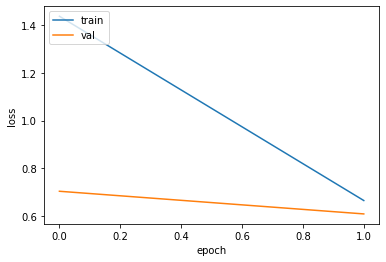


 Results Below
r:  -0.0465
Epoch 1/2
31/31 [==============================] - 11s 360ms/step - loss: 0.4507 - val_loss: 0.4544
Epoch 2/2
31/31 [==============================] - 11s 360ms/step - loss: 0.3867 - val_loss: 0.4307

Training Performance


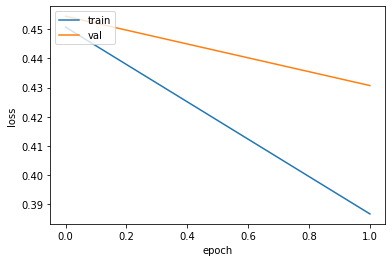


 Results Below
r:  0.0547
Epoch 1/2
31/31 [==============================] - 11s 361ms/step - loss: 0.5343 - val_loss: 0.5759
Epoch 2/2
31/31 [==============================] - 11s 360ms/step - loss: 0.5001 - val_loss: 0.5216

Training Performance


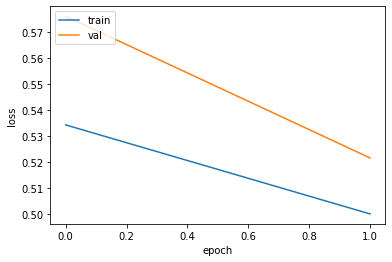


 Results Below
r:  0.1252
Epoch 1/2
31/31 [==============================] - 11s 361ms/step - loss: 0.3846 - val_loss: 0.4107
Epoch 2/2
31/31 [==============================] - 11s 360ms/step - loss: 0.3540 - val_loss: 0.4179

Training Performance


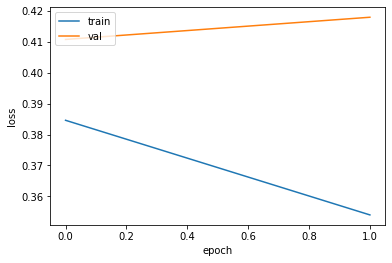


 Results Below
r:  -0.0043
Epoch 1/2
31/31 [==============================] - 11s 361ms/step - loss: 1.2781 - val_loss: 0.7628
Epoch 2/2
31/31 [==============================] - 11s 360ms/step - loss: 0.6345 - val_loss: 0.7109

Training Performance


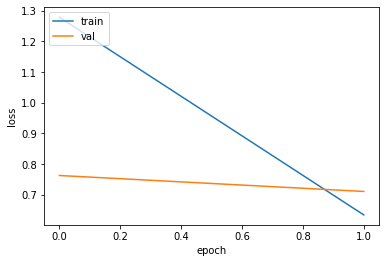


 Results Below
r:  -0.014


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Results Downloaded


In [ ]:
from pandas import DataFrame

#training loop
#can handle multiple outcome varaibles and a single model setting

#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights = True)


cor = []

for i in range(0, len(y_train_list)):
  history = model.fit(lstm_x_train, y_train_list[i], epochs=2, batch_size = 32, validation_split = 0.1)
  y_pred = model.predict(lstm_x_test)

  print()
  print('Training Performance')
  print('=======================================')
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()




  print('\n Results Below')
  print('=======================================')

  y_flat = y_pred.flatten()
  r = stats.pearsonr(y_test_list[i], y_flat)

  print('r: ', round(r[0],4))
  cor.append(r)


lstm_results = pd.DataFrame(columns = ['r'])

lstm_results['r'] = cor

from google.colab import files
lstm_results.to_csv('lstm_output_10_15.csv') 
files.download('lstm_output_10_15.csv')


print('Results Downloaded')



In [ ]:
model = Sequential()
model.add(Embedding_layer)
model.add(Bidirectional(LSTM(300)))
model.add(Dropout(0.2))
#model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation= 'relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss = 'mean_squared_error', optimizer='adam')

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4228, 300)         2164500   
_________________________________________________________________
bidirectional_6 (Bidirection (None, 600)               1442400   
_________________________________________________________________
dropout_6 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                30050     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 3,637,001
Trainable params: 1,472,501
Non-trainable params: 2,164,500
_________________________________________________________________
None


Epoch 1/2
31/31 [==============================] - 25s 736ms/step - loss: 1.2604 - val_loss: 0.6349
Epoch 2/2
31/31 [==============================] - 22s 717ms/step - loss: 0.6286 - val_loss: 0.6091

Training Performance


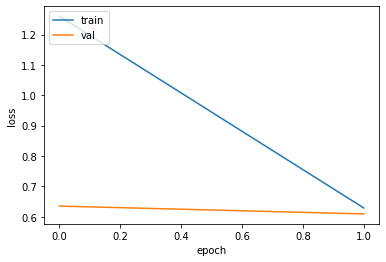


 Results Below
r:  -0.0127
Epoch 1/2
31/31 [==============================] - 22s 718ms/step - loss: 0.4526 - val_loss: 0.3942
Epoch 2/2
31/31 [==============================] - 22s 716ms/step - loss: 0.3698 - val_loss: 0.4164

Training Performance


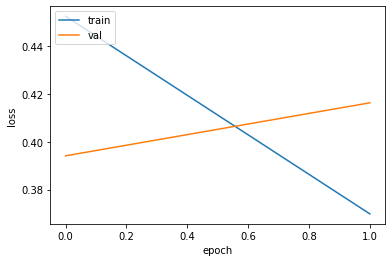


 Results Below
r:  0.07
Epoch 1/2
31/31 [==============================] - 22s 718ms/step - loss: 0.5353 - val_loss: 0.5341
Epoch 2/2
31/31 [==============================] - 22s 717ms/step - loss: 0.5242 - val_loss: 0.5689

Training Performance


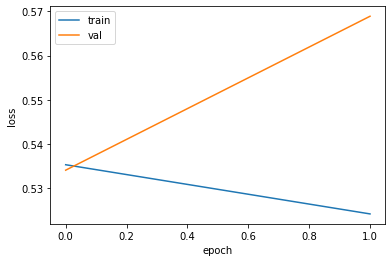


 Results Below
r:  0.0805
Epoch 1/2
31/31 [==============================] - 22s 718ms/step - loss: 0.3940 - val_loss: 0.4370
Epoch 2/2
31/31 [==============================] - 22s 718ms/step - loss: 0.3793 - val_loss: 0.3777

Training Performance


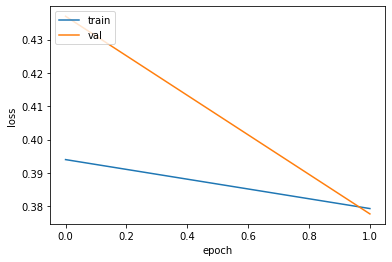


 Results Below
r:  -0.0467
Epoch 1/2
31/31 [==============================] - 22s 718ms/step - loss: 1.2418 - val_loss: 0.7128
Epoch 2/2
31/31 [==============================] - 22s 719ms/step - loss: 0.6013 - val_loss: 0.7068

Training Performance


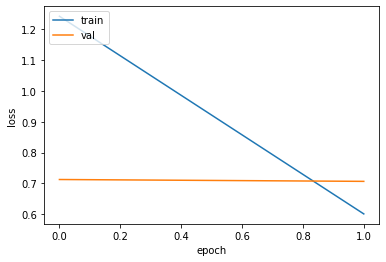


 Results Below
r:  0.0446


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Results Downloaded


In [ ]:
#training loop
#can handle multiple outcome varaibles and a single model setting

#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights = True)


cor = []

for i in range(0, len(y_train_list)):
  history = model.fit(lstm_x_train, y_train_list[i], epochs=2, batch_size = 32, validation_split = 0.1)
  y_pred = model.predict(lstm_x_test)

  print()
  print('Training Performance')
  print('=======================================')
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()




  print('\n Results Below')
  print('=======================================')

  y_flat = y_pred.flatten()
  r = stats.pearsonr(y_test_list[i], y_flat)

  print('r: ', round(r[0],4))
  cor.append(r)

lstm_results = pd.DataFrame(columns = ['r'])

lstm_results['r'] = cor

from google.colab import files
lstm_results.to_csv('lstm_output_bidirectional.csv') 
files.download('lstm_output_bidirectional.csv')


print('Results Downloaded')



In [ ]:
y_flat.shape

(1268400,)

In [ ]:
y_pred.shape

(300, 4228, 1)

# LSTM Random Grid Search

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [68]:
def create_model(num_neurons, dropout_rate):
  model = Sequential()
  model.add(Embedding_layer)
  model.add(LSTM(num_neurons))
  model.add(Dropout(dropout_rate))
  #model.add(Dense(100, activation = 'relu'))
  #model.add(Dropout(0.6))
  model.add(Dense(1, activation='linear'))
  model.compile(loss = 'mean_squared_error', optimizer='adam')

  print(model.summary())
  
  return model

In [69]:
neurons = np.arange(50, 300, 50)
dropout = np.arange(.1, .7, .1)

param_grid = dict(num_neurons = neurons, dropout_rate = dropout)

model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=16, verbose=2)

grid = RandomizedSearchCV(model, param_distributions = param_grid, scoring = 'explained_variance', cv = 5, n_iter = 60, random_state = 152)

<ipython-input-69-367886cfcd8d>:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=16, verbose=2)


In [70]:
def lstm_train_test(grid, train_x, y_train, x_test, y_test):

  #fit grid
  grid_result = grid.fit(train_x, y_train)

  #track results
  grid_result.best_params_

  best_parameters = grid_result.best_params_
  best_estimator = grid_result.best_estimator_
    
  print('Grid Search Complete')
  print('==================================')
  
  ##### predict on test data
  y_pred = best_estimator.predict(x_test)

  r = pearsonr(y_test, y_pred)
  print('r: ', r)

  return r

In [71]:
#run optimization across all models

from tqdm import tqdm

n_iterations = 50

results = []

for i in tqdm(range(0, len(y_train_list))):

  for n in tqdm(range(n_iterations)):

    x_boot, y_boot = resample(lstm_x_train, y_train_list[i], replace=True)
    
    acc = lstm_train_test(grid, x_boot, y_boot, lstm_x_test, y_test_list[i])

    print(acc)

    results.append(acc)

55/55 - 11s - loss: 74.1657 - 11s/epoch - 191ms/step
7/7 [==============================] - 2s 173ms/step
Model: "sequential_202"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4228, 300)         2164500   
                                                                 
 lstm_202 (LSTM)             (None, 200)               400800    
                                                                 
 dropout_27 (Dropout)        (None, 200)               0         
                                                                 
 dense_27 (Dense)            (None, 1)                 201       
                                                                 
Total params: 2,565,501
Trainable params: 401,001
Non-trainable params: 2,164,500
_________________________________________________________________
None
Epoch 1/10
55/55 - 12s - loss: 227.0457 - 12s/epoch - 210

  0%|          | 0/5 [34:08<?, ?it/s]


KeyboardInterrupt: ignored

# Big Bird

# Packages

In [ ]:
!pip install simpletransformers

     |████████████████████████████████| 249 kB 36.0 MB/s 
     |████████████████████████████████| 4.0 MB 57.9 MB/s 
     |████████████████████████████████| 6.6 MB 59.6 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
     |████████████████████████████████| 1.2 MB 51.0 MB/s 
     |████████████████████████████████| 325 kB 59.3 MB/s 
     |████████████████████████████████| 1.8 MB 58.4 MB/s 
     |████████████████████████████████| 10.1 MB 66.4 MB/s 
     |████████████████████████████████| 895 kB 63.9 MB/s 
     |████████████████████████████████| 77 kB 8.2 MB/s 
     |████████████████████████████████| 596 kB 75.0 MB/s 
     |████████████████████████████████| 181 kB 73.7 MB/s 
     |████████████████████████████████| 144 kB 72.4 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
     |████████████████████████████████| 212 kB 71.3 MB/s 
     |████████████████████████████████| 1.1 MB 52.7 MB/s 
     |████████████████████████████████| 136 kB 78.6 MB/s 
     |█████████████

In [ ]:
!pip install wandb

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import logging
import torch
import scipy.stats
from scipy.stats import pearsonr
import wandb

In [ ]:
#check for cuda
cuda_available = torch.cuda.is_available()

In [ ]:
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# Dataset Creation

In [ ]:
#prepare train data
e_bert_train_df = train[['Response', 'E_Scale_score']].rename(columns = {'Response' : 'text', 'E_Scale_score': 'labels'})
a_bert_train_df = train[['Response', 'A_Scale_score']].rename(columns = {'Response' : 'text', 'A_Scale_score': 'labels'})
o_bert_train_df = train[['Response', 'O_Scale_score']].rename(columns = {'Response' : 'text', 'O_Scale_score': 'labels'})
c_bert_train_df = train[['Response', 'C_Scale_score']].rename(columns = {'Response' : 'text', 'C_Scale_score': 'labels'})
n_bert_train_df = train[['Response', 'N_Scale_score']].rename(columns = {'Response' : 'text', 'N_Scale_score': 'labels'})


bert_train_list = [e_bert_train_df, a_bert_train_df, o_bert_train_df, c_bert_train_df, n_bert_train_df]

In [ ]:
# #prepare eval data
# e_bert_dev_df = dev[['Response', 'E_Scale_score']].rename(columns = {'Response' : 'text', 'E_Scale_score': 'labels'})
# a_bert_dev_df = dev[['Response', 'A_Scale_score']].rename(columns = {'Response' : 'text', 'A_Scale_score': 'labels'})
# o_bert_dev_df = dev[['Response', 'O_Scale_score']].rename(columns = {'Response' : 'text', 'O_Scale_score': 'labels'})
# c_bert_dev_df = dev[['Response', 'C_Scale_score']].rename(columns = {'Response' : 'text', 'C_Scale_score': 'labels'})
# n_bert_dev_df = dev[['Response', 'N_Scale_score']].rename(columns = {'Response' : 'text', 'N_Scale_score': 'labels'})

# bert_dev_list = [e_bert_dev_df, a_bert_dev_df, o_bert_dev_df, c_bert_dev_df, n_bert_dev_df]

In [ ]:
e_bert_test_df = test[['Response', 'E_Scale_score']].rename(columns = {'Response' : 'text', 'E_Scale_score': 'labels'})
a_bert_test_df = test[['Response', 'A_Scale_score']].rename(columns = {'Response' : 'text', 'A_Scale_score': 'labels'})
o_bert_test_df = test[['Response', 'O_Scale_score']].rename(columns = {'Response' : 'text', 'O_Scale_score': 'labels'})
c_bert_test_df = test[['Response', 'C_Scale_score']].rename(columns = {'Response' : 'text', 'C_Scale_score': 'labels'})
n_bert_test_df = test[['Response', 'N_Scale_score']].rename(columns = {'Response' : 'text', 'N_Scale_score': 'labels'})

bert_test_list = [e_bert_test_df, a_bert_test_df, o_bert_test_df, c_bert_test_df, n_bert_test_df]

# Configure Models

In [ ]:
#regression settings for model
#number of epochs
#consider early stopping

model_args = ClassificationArgs()
model_args.regression = True
model_args.overwrite_output_dir = True	
model_args.evaluate_during_training = False
model_args.num_train_epochs = 10
model_args.use_early_stopping = True
model_args.early_stopping_delta = 0.01
model_args.early_stopping_patience = 3
model_args.evaluate_during_training_steps = 1000

# Create a ClassificationModel
model = ClassificationModel(
    "bigbird",
    "google/bigbird-roberta-base",
    num_labels=1,
    args=model_args, 
    use_cuda= cuda_available
)

# Train Models

In [ ]:
corrs = []
n_iterations = []

for i in range(0, len(y_train_list)):
  for n in n_iterations:
    boot = resample(bert_train_list[i], replace=True)
    model.train_model(boot)
    result, model_outputs, wrong_predictions = model.eval_model(bert_test_list[i])
    cor = pearsonr(model_outputs, y_test_list[i])
    print(f'correlation is: {cor}')
    corrs.append(cor)

# RoBERTA Data Prep

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dissertation_data/MLdata.csv')


In [ ]:
df.head()

,Respondent_ID,open_ended_1,open_ended_2,open_ended_3,open_ended_4,open_ended_5,E_Scale_score,A_Scale_score,O_Scale_score,C_Scale_score,N_Scale_score,Dataset
0,10446116527,"I would change my vacation week, because I am ...",I would reach out to my boss and ask him or he...,I would not go. I am a not a social person. I ...,I would ask my manager why he/she gave me such...,I would find this experience super enjoyable. ...,2.250000,3.750000,3.166667,3.750000,2.916667,Train
1,10440100535,I would talk to my colleague and see if they w...,I would continue to work on the project that w...,I would talk to my colleague and try to talk t...,I would feel upset about the negative feedback...,I would find this experience enjoyable. I feel...,4.666667,4.416667,4.583333,5.000000,1.333333,Train
2,10462850071,I would feel upset because perhaps I already b...,I would start working on the project now and g...,I would feel guilty about thinking about not g...,I would feel really defensive about it. I woul...,I would find it enjoyable because I would be r...,2.250000,4.750000,4.083333,4.666667,2.166667,Train
3,10460008027,I would suggest that whoever requested the tim...,I would try to finish early because it's alway...,"I wouldn't want to go, but I'd have to weigh t...",I would first wait until I'm calm. Then I wou...,I would love to have the opportunity to learn ...,2.916667,4.083333,3.916667,4.916667,1.333333,Train
4,10459746373,I would talk to my colleague to see if he has ...,I would remind my boss that I am working on th...,I would go anyway. Networking is a good way to...,I would talk to my manager first and get some ...,I would find this experience enjoyable as I am...,3.750000,4.750000,3.666667,4.916667,1.583333,Train


In [ ]:
#round scale scores
cols = ['E_Scale_score', 'A_Scale_score', 'O_Scale_score', 'C_Scale_score', 'N_Scale_score']
df[cols] = df[cols].round(2)


In [ ]:

#prepare train data
e_bert_train_df = train[['open_ended_3', 'E_Scale_score']].rename(columns = {'open_ended_3': 'text', 'E_Scale_score': 'labels'})
a_bert_train_df = train[['open_ended_1', 'A_Scale_score']].rename(columns = {'open_ended_1': 'text', 'A_Scale_score': 'labels'})
o_bert_train_df = train[['open_ended_5', 'O_Scale_score']].rename(columns = {'open_ended_5': 'text', 'O_Scale_score': 'labels'})
c_bert_train_df = train[['open_ended_2', 'C_Scale_score']].rename(columns = {'open_ended_2' : 'text', 'C_Scale_score': 'labels'})
n_bert_train_df = train[['open_ended_4', 'N_Scale_score']].rename(columns = {'open_ended_4' : 'text', 'N_Scale_score': 'labels'})


bert_train_list = [e_bert_train_df, a_bert_train_df, o_bert_train_df, c_bert_train_df, n_bert_train_df]

In [ ]:
#prepare eval data
e_bert_dev_df = dev[['open_ended_3', 'E_Scale_score']].rename(columns = {'open_ended_3' : 'text', 'E_Scale_score': 'labels'})
a_bert_dev_df = dev[['open_ended_1', 'A_Scale_score']].rename(columns = {'open_ended_1' : 'text', 'A_Scale_score': 'labels'})
o_bert_dev_df = dev[['open_ended_5', 'O_Scale_score']].rename(columns = {'open_ended_5' : 'text', 'O_Scale_score': 'labels'})
c_bert_dev_df = dev[['open_ended_2', 'C_Scale_score']].rename(columns = {'open_ended_2' : 'text', 'C_Scale_score': 'labels'})
n_bert_dev_df = dev[['open_ended_4', 'N_Scale_score']].rename(columns = {'open_ended_4' : 'text', 'N_Scale_score': 'labels'})

bert_dev_list = [e_bert_dev_df, a_bert_dev_df, o_bert_dev_df, c_bert_dev_df, n_bert_dev_df]

In [ ]:
e_bert_test_df = test[['open_ended_3', 'E_Scale_score']].rename(columns = {'open_ended_3': 'text', 'E_Scale_score': 'labels'})
a_bert_test_df = test[['open_ended_1', 'A_Scale_score']].rename(columns = {'open_ended_1': 'text', 'A_Scale_score': 'labels'})
o_bert_test_df = test[['open_ended_5', 'O_Scale_score']].rename(columns = {'open_ended_5' : 'text', 'O_Scale_score': 'labels'})
c_bert_test_df = test[['open_ended_2', 'C_Scale_score']].rename(columns = {'open_ended_2' : 'text', 'C_Scale_score': 'labels'})
n_bert_test_df = test[['open_ended_4', 'N_Scale_score']].rename(columns = {'open_ended_4' : 'text', 'N_Scale_score': 'labels'})

bert_test_list = [e_bert_test_df, a_bert_test_df, o_bert_test_df, c_bert_test_df, n_bert_test_df]

In [ ]:
n_bert_train_df.head()

#a: 1
#c: 2
#e: 3
#n: 4
#o: 5

,text,labels
0,I would ask my manager why he/she gave me such...,2.92
1,I would feel upset about the negative feedback...,1.33
2,I would feel really defensive about it. I woul...,2.17
3,I would first wait until I'm calm. Then I wou...,1.33
4,I would talk to my manager first and get some ...,1.58


# Model settings

In [ ]:
#regression settings for model
#number of epochs
#consider early stopping

model_args = ClassificationArgs()
model_args.regression = True
model_args.overwrite_output_dir = True
model_args.evaluate_during_training = False
model_args.num_train_epochs = 2

In [ ]:
# Create a ClassificationModel
model = ClassificationModel(
    "bert",
    "bert-base-cased",
    num_labels=1,
    args=model_args, 
    use_cuda= cuda_available
)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

# Roberta Data augmentation

In [ ]:
!pip install nlpaug

     |████████████████████████████████| 410 kB 8.7 MB/s eta 0:00:01


In [ ]:
#augment training data
import nltk
import nlpaug.augmenter.word as naw


INFO:summarizer.preprocessing.cleaner:'pattern' package not found; tag filters are not available for English


In [ ]:
aug = naw.SynonymAug(aug_src='wordnet',aug_max=2)
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

aug.augment("Misleading reviews. Worst coffee ever had, and sorely disappointing vibe.",n=2)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


['Misleading recap. Worst deep brown ever had, and sorely disappointing vibe.',
 "Misleading reviews. Worst coffee e'er had, and painfully disappointing vibe."]

In [ ]:
aug = naw.ContextualWordEmbsAug(model_path = 'distilbert-base-cased', action = 'substitute', aug_min = 3, device = 'cuda')


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/411 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/251M [00:00<?, ?B/s]

In [ ]:
#times = 10
counter = 0
second_counter = 0

auged_results = []
outcome = []


for i in bert_train_list:

  data = i['text'].tolist()
  label = i['labels'].tolist()

  for d,l in zip(data,label):
    second_counter +=1
    if second_counter % 250 == 0:
      print(second_counter)
    for r in range(0,5):
        auged_results.append((aug.augment(d)))
        outcome.append(l)

  counter +=1
  print('Next loop')
  print(counter)

print(len(auged_results))
print(len(outcome))


250
500
750
1000
Next loop
1
1250
1500
1750
2000
Next loop
2
2250
2500
2750
3000
3250
Next loop
3
3500
3750
4000
4250
Next loop
4
4500
4750
5000
5250
Next loop
5
27200
27200


In [ ]:
len(bert_train_list[0]) *  5 * 5

27200

In [ ]:
len(bert_train_list[0])

1088

In [ ]:
len(bert_train_list[0]) *  5 

5440

In [ ]:
augmented_df = pd.DataFrame()
augmented_df['text'] = auged_results
augmented_df['labels'] = outcome
augmented_df.head()

,text,labels
0,I shall always go. I am a not a feminist activ...,2.25
1,I does not go. I am a just a social person. I ...,2.25
2,I might rather go. I am a not a caring person....,2.25
3,I would always go. I am a not a lone animal. I...,2.25
4,I won not go. I am a strictly a social type. I...,2.25


In [ ]:
from google.colab import files
augmented_df.to_csv('augmented_results.csv') 
files.download('augmented_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
augmented_df['text'][5448]

'I would talk to my colleague and see if we were willing to change the vacation date or I really needed to have this week off. If the colleague was not willing to change it I might go talking to my boss. I had explain to my boss that I would still like to have one week off I requested but if it is not possible than I will take the summer after. I would do this like this because I think it would make it difficult if I would not want to start a workplace conflict over a vacation week'

In [ ]:
#bring to original data

bert_train_name_list = ['e_bert_train_df', 'a_bert_train_df', 'o_bert_train_df', 'c_bert_train_df', 'n_bert_train_df']


name_list = []

for x in bert_train_name_list:
  for i in range(0,len(bert_train_list[0]) * 5):
    name_list.append(x)

len(name_list)

27200

In [ ]:
augmented_df['construct'] = name_list

In [ ]:
augmented_df.head()

In [ ]:
augmented_df.loc[augmented_df['construct'] == 'n_bert_train_df']

In [ ]:
augmented_df.to_csv('augmented_results_4_27.csv') 
files.download('augmented_results_4_27.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Reload augmented data

In [ ]:
augmented_df = pd.read_csv('/content/drive/MyDrive/dissertation_data/augmented_results_4_27.csv')
augmented_df.head()

,Unnamed: 0,text,labels,construct
0,0,I shall always go. I am a not a feminist activ...,2.25,e_bert_train_df
1,1,I does not go. I am a just a social person. I ...,2.25,e_bert_train_df
2,2,I might rather go. I am a not a caring person....,2.25,e_bert_train_df
3,3,I would always go. I am a not a lone animal. I...,2.25,e_bert_train_df
4,4,I won not go. I am a strictly a social type. I...,2.25,e_bert_train_df


In [ ]:
augmented_df['construct'].value_counts()

e_bert_train_df    5440
a_bert_train_df    5440
o_bert_train_df    5440
c_bert_train_df    5440
n_bert_train_df    5440
Name: construct, dtype: int64

In [ ]:
#e,a,o,c,n
#seperate dfs back into list

names = ['e_bert_train_df', 'a_bert_train_df', 'o_bert_train_df', 'c_bert_train_df', 'n_bert_train_df']

augmented_list = []

for i in names:
  d = augmented_df.loc[augmented_df['construct'] == i]
  augmented_list.append(d)

augmented_list


In [ ]:
concat_list = []

for x,y in zip(augmented_list, bert_train_list):
  d = pd.concat([x,y])
  concat_list.append(d)

for i in concat_list:
  print(len(i))
  print(i.head())

# Train roberta

In [ ]:
corrs = []

for i in range(0, len(y_train_list)):
  model.train_model(concat_list[i])
  result, model_outputs, wrong_predictions = model.eval_model(bert_test_list[i])
  cor = pearsonr(model_outputs, y_test_list[i])
  print(f'correlation is: {cor}')
  corrs.append(cor)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/6528 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_bert_128_1_2
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/816 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Running Epoch 1 of 2:   0%|          | 0/816 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of bert model complete. Saved to outputs/.
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/300 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_bert_128_1_2


Running Evaluation:   0%|          | 0/38 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'eval_loss': 0.9227528799521295}
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


correlation is: (0.06517828751488199, 0.2604173561199896)


  0%|          | 0/6528 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_bert_128_1_2


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/816 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/816 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of bert model complete. Saved to outputs/.
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/300 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_bert_128_1_2


Running Evaluation:   0%|          | 0/38 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'eval_loss': 0.47027397822392614}
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


correlation is: (0.14508510484219167, 0.01187686129638031)


  0%|          | 0/6528 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_bert_128_1_2


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/816 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/816 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of bert model complete. Saved to outputs/.
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/300 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_bert_128_1_2


Running Evaluation:   0%|          | 0/38 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'eval_loss': 0.6900327542894765}
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


correlation is: (0.06480946136265936, 0.2631301543945939)


  0%|          | 0/6528 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_bert_128_1_2


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/816 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/816 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of bert model complete. Saved to outputs/.
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/300 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_bert_128_1_2


Running Evaluation:   0%|          | 0/38 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'eval_loss': 0.496230342376389}
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


correlation is: (0.08343497070784872, 0.14941021355994477)


  0%|          | 0/6528 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_bert_128_1_2


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/816 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/816 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of bert model complete. Saved to outputs/.
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/300 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_bert_128_1_2


Running Evaluation:   0%|          | 0/38 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'eval_loss': 0.7452876752144412}


correlation is: (0.035905742242666405, 0.5355809345301636)
